<a href="https://colab.research.google.com/github/finesaaa/clustering-assignment/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import missingno

In [2]:
dataset = pd.read_csv("travel insurance.csv")
dataset.head() 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


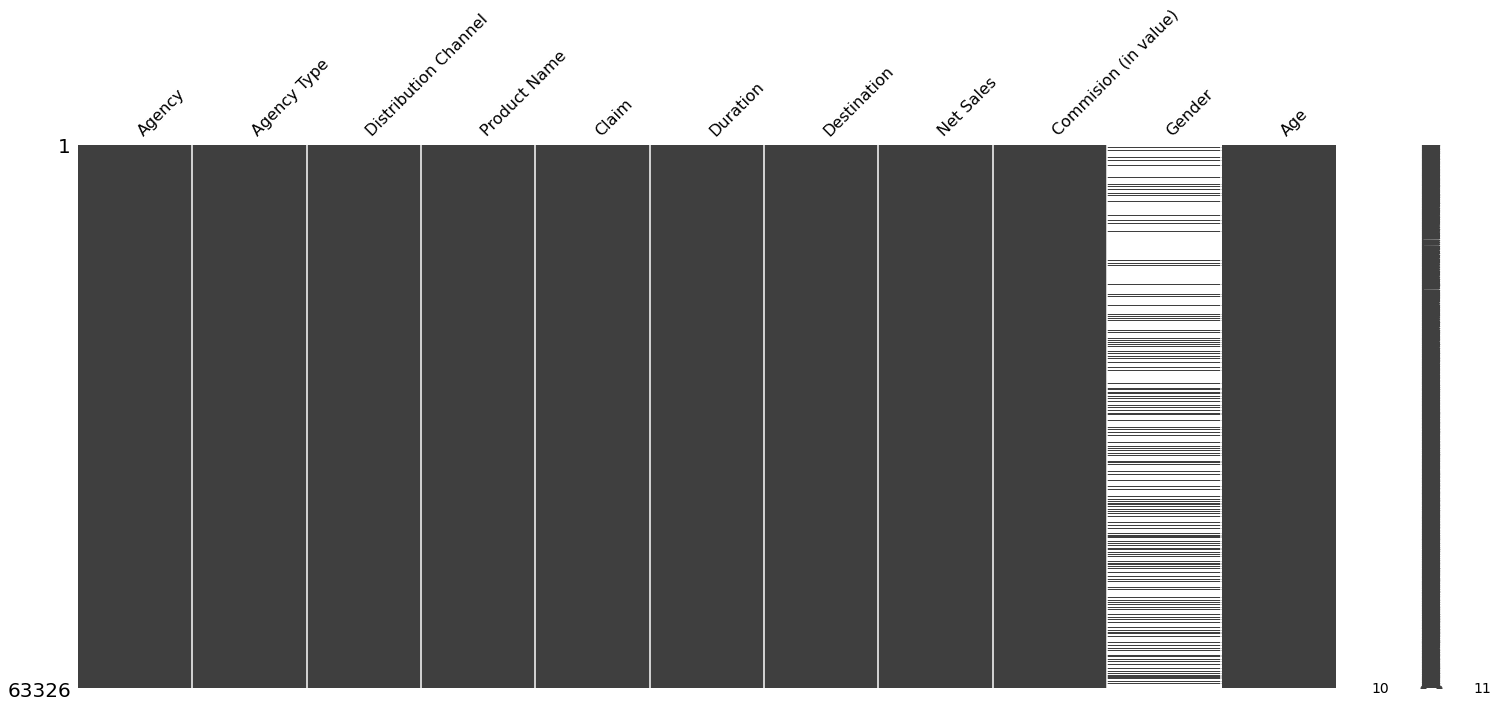

In [4]:
missingno.matrix(dataset)

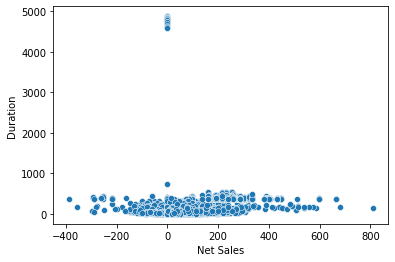

In [5]:
import seaborn as sns
sns.scatterplot(x='Net Sales', y='Duration', data=dataset)
# sns.countplot(x='Agency', data=data_raw)
# sns.countplot(x='Product Name', data=data_raw)

In [6]:
selected_dataset = dataset[['Net Sales',  'Duration']]
selected_dataset = pd.DataFrame(selected_dataset, columns=['Net Sales',  'Duration'])
selected_dataset

,Net Sales,Duration
0,-29.0,186
1,-29.0,186
2,-49.5,65
3,-39.6,60
4,-19.8,79
...,...,...
63321,35.0,111
63322,40.0,58
63323,18.0,2
63324,18.0,3


## Remove Outliers

In [7]:
Q1 = np.percentile(selected_dataset['Duration'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(selected_dataset['Duration'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR, Q3, Q1)

44.0 53.0 9.0


In [8]:
# Upper bound
upper = np.where(selected_dataset['Duration'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(selected_dataset['Duration'] <= (Q1-1.5*IQR))

In [9]:
''' Removing the Outliers '''
cleaned_dataset = selected_dataset.copy(deep=True)
cleaned_dataset.drop(upper[0], inplace = True)
cleaned_dataset.drop(lower[0], inplace = True)

In [10]:
cleaned_dataset #after remove outliers

,Net Sales,Duration
2,-49.5,65
3,-39.6,60
4,-19.8,79
5,-121.0,66
6,-39.6,47
...,...,...
63321,35.0,111
63322,40.0,58
63323,18.0,2
63324,18.0,3


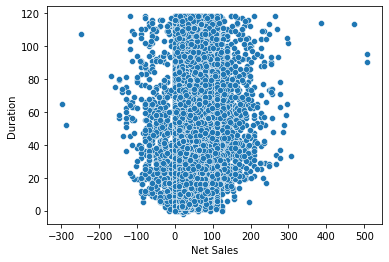

In [11]:
sns.scatterplot(x='Net Sales', y='Duration', data=cleaned_dataset)

In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler
normalized_dataset = StandardScaler().fit_transform(np.nan_to_num(cleaned_dataset))
normalized_dataset

array([[-2.79451363,  1.34438653],
       [-2.46350003,  1.15783034],
       [-1.80147283,  1.86674386],
       ...,
       [-0.53760271, -1.00622144],
       [-0.53760271, -0.9689102 ],
       [-0.27011698, -0.25999668]])

In [13]:
# from scipy import stats
# z_scores = stats.zscore(data_set)
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 9).all(axis=1)
# data_norm = data_set[filtered_entries]

## Elbow Method

In [14]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans 
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
 
for k in K:
    # Building and fitting the model
    kmeans_model = KMeans(init = "k-means++", n_clusters = k, n_init=12)
    kmeans_model.fit(normalized_dataset)
 
    distortions.append(sum(np.min(cdist(normalized_dataset, kmeans_model.cluster_centers_,
                                        'euclidean'), axis=1)) / normalized_dataset.shape[0])
    inertias.append(kmeans_model.inertia_)
 
    mapping1[k] = sum(np.min(cdist(normalized_dataset, kmeans_model.cluster_centers_,
                                   'euclidean'), axis=1)) / normalized_dataset.shape[0]
    mapping2[k] = kmeans_model.inertia_

In [15]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.1677429181575523
2 : 0.8624810001664616
3 : 0.6961341300187142
4 : 0.6357353806328531
5 : 0.5515382782617001
6 : 0.518785566873992
7 : 0.4879304908725661
8 : 0.47782180625523657
9 : 0.44346960873539765
10 : 0.4185991571855452
11 : 0.40057088412543596
12 : 0.3830122176152031
13 : 0.3723545436668593
14 : 0.35476868586071897


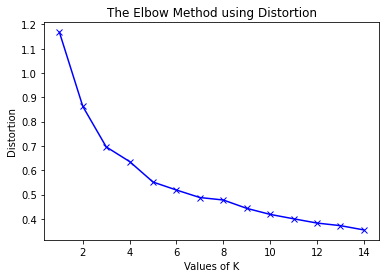

In [16]:
from matplotlib import pyplot as plt 
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

## KMeans 3 Clustering

In [17]:
cluster_num = 3
k_means = KMeans(init = "k-means++", n_clusters = cluster_num, n_init=12)
k_means.fit(normalized_dataset)
labels_3 = k_means.labels_
print(labels_3)

[0 0 0 ... 1 1 1]


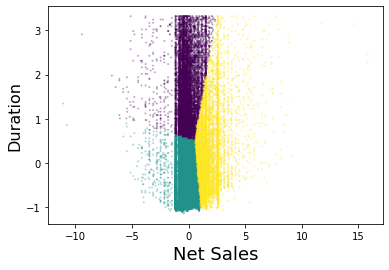

In [18]:
area = 1.2
plt.scatter(normalized_dataset[:, 0], normalized_dataset[:, 1], s=area, c=labels_3.astype(np.float), alpha=0.25)
plt.xlabel('Net Sales', fontsize=18)
plt.ylabel('Duration', fontsize=16)

plt.show()

## KMeans 5 Clustering

In [19]:
cluster_num = 5
k_means = KMeans(init = "k-means++", n_clusters = cluster_num, n_init=12)
k_means.fit(normalized_dataset)
labels_5 = k_means.labels_
print(labels_5)

[2 2 0 ... 1 1 1]


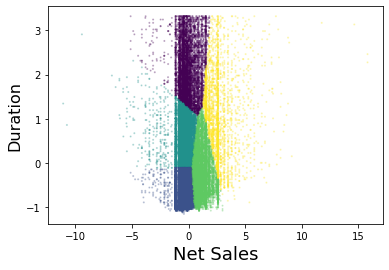

In [20]:
area = 1.2
plt.scatter(normalized_dataset[:, 0], normalized_dataset[:, 1], s=area, c=labels_5.astype(np.float), alpha=0.25)
plt.xlabel('Net Sales', fontsize=18)
plt.ylabel('Duration', fontsize=16)

plt.show()